In [157]:
import sys
sys.path.append('/home/elena/astrocosmolib/')

import numpy as np
import matplotlib.pyplot as plt

from astropy import units as u

from pyACC.integrate import Integrate
from pyACC.cosmology import CosmologicalDistances

import pandas as pd

In [158]:
file_data = "data.csv"
data = pd.read_csv(file_data)
data = data.astype(float)
data.head()

,z_eff,D_V / r_d,D_M / r_d,D_H / r_d,D_V / r_d_err,D_M / r_d_err,D_H / r_d_err
0,0.295,7.942,13.588,21.863,0.075,0.168,0.425
1,0.510,12.720,17.351,19.455,0.099,0.177,0.330
2,0.706,16.050,17.351,19.455,0.110,0.177,0.330
3,0.934,19.721,21.576,17.641,0.091,0.152,0.193
4,1.321,24.252,27.601,14.176,0.174,0.318,0.221


In [159]:
z_eff = data["z_eff"]
D_V= data["D_V / r_d"]
D_M = data["D_M / r_d"]
D_H = data["D_H / r_d"]
D_V_err = data["D_V / r_d_err"]
D_M_err = data["D_M / r_d_err"]
D_H_err = data["D_H / r_d_err"]

In [160]:
def hubble_w0waCDM(z, Omega_M, H0, w0, wa):
    return H0 * np.sqrt(Omega_M * (1 + z)**3 +(1-Omega_M) * (1 + z)**(3*(1+w0+wa)) * np.exp(-3 * wa * z / (1 + z)))
    
def hubble_wCDM(z, Omega_M, H0, w):
    return H0 * np.sqrt(Omega_M * (1 + z)**3 +(1-Omega_M) * (1 + z)**(3*(1+w)))

def hubble_LCDM(z, Omega_M, H0):
    return H0 * np.sqrt(Omega_M * (1 + z)**3 +(1-Omega_M))

In [161]:
distances_LCDM_CMB = CosmologicalDistances(hubble_LCDM, 0.3169, 67.14) #black
distances_LCDM_DESI = CosmologicalDistances(hubble_LCDM,  0.2975, 69) #blue
distances_LCDM_DESI_CMB = CosmologicalDistances(hubble_LCDM, 0.3034, 68.51) #purple
distances_wCDM_DESI_CMB_DESY5 = CosmologicalDistances(hubble_wCDM, 0.3098, 67.34, -0.971) #light blue
distances_w0waCDM_DESI_DESY5 = CosmologicalDistances(hubble_w0waCDM, 0.319, 66.8, -0.781, -0.72) #green
distances_w0waCDM_DESI_CMB_DESY5 = CosmologicalDistances(hubble_w0waCDM, 0.3191, 66.74, -0.752, -0.86) #red

In [162]:
r_d = 147.05

D_V_fid = [distances_LCDM_CMB.volume_distance(z)/r_d for z in z_eff]
D_V_ratio = D_V / D_V_fid
D_V_ratio_err = D_V_err / D_V_fid

D_M_fid = [distances_LCDM_CMB.comoving_distance(z)/r_d for z in z_eff]
D_M_ratio = D_M / D_M_fid
D_M_ratio_err = D_M_err / D_M_fid

D_H_fid = [distances_LCDM_CMB.hubble_distance(z)/r_d for z in z_eff]
D_H_ratio = D_H / D_H_fid
D_H_ratio_err = D_H_err / D_H_fid

In [163]:
z_list = np.linspace(0.02, 3, 1000)

dv_LCDM_CMB = [(distances_LCDM_CMB.volume_distance(z)) / (distances_LCDM_CMB.volume_distance(z)) for z in z_list] 
dv_LCDM_DESI = [(distances_LCDM_DESI.volume_distance(z)) / (distances_LCDM_CMB.volume_distance(z)) for z in z_list]
dv_LCDM_DESI_CMB = [(distances_LCDM_DESI_CMB.volume_distance(z)) / (distances_LCDM_CMB.volume_distance(z)) for z in z_list] 
dv_wCDM_DESI_CMB_DESY5 = [(distances_wCDM_DESI_CMB_DESY5.volume_distance(z)) / (distances_LCDM_CMB.volume_distance(z)) for z in z_list]  
dv_w0waCDM_DESI_DESY5 = [(distances_w0waCDM_DESI_DESY5.volume_distance(z)) / (distances_LCDM_CMB.volume_distance(z)) for z in z_list]
dv_w0waCDM_DESI_CMB_DESY5 = [(distances_w0waCDM_DESI_CMB_DESY5.volume_distance(z)) / (distances_LCDM_CMB.volume_distance(z)) for z in z_list] 

dm_LCDM_CMB = [(distances_LCDM_CMB.comoving_distance(z)) / (distances_LCDM_CMB.comoving_distance(z)) for z in z_list]
dm_LCDM_DESI = [(distances_LCDM_DESI.comoving_distance(z)) / (distances_LCDM_CMB.comoving_distance(z)) for z in z_list]
dm_LCDM_DESI_CMB = [(distances_LCDM_DESI_CMB.comoving_distance(z)) / (distances_LCDM_CMB.comoving_distance(z)) for z in z_list]
dm_wCDM_DESI_CMB_DESY5 = [(distances_wCDM_DESI_CMB_DESY5.comoving_distance(z)) / (distances_LCDM_CMB.comoving_distance(z)) for z in z_list]
dm_w0waCDM_DESI_DESY5 = [(distances_w0waCDM_DESI_DESY5.comoving_distance(z)) / (distances_LCDM_CMB.comoving_distance(z)) for z in z_list]
dm_w0waCDM_DESI_CMB_DESY5 = [(distances_w0waCDM_DESI_CMB_DESY5.comoving_distance(z)) / (distances_LCDM_CMB.comoving_distance(z)) for z in z_list]

dh_LCDM_CMB = [(distances_LCDM_CMB.hubble_distance(z)) / (distances_LCDM_CMB.hubble_distance(z)) for z in z_list]
dh_LCDM_DESI = [(distances_LCDM_DESI.hubble_distance(z)) / (distances_LCDM_CMB.hubble_distance(z)) for z in z_list]
dh_LCDM_DESI_CMB = [(distances_LCDM_DESI_CMB.hubble_distance(z)) / (distances_LCDM_CMB.hubble_distance(z)) for z in z_list]
dh_wCDM_DESI_CMB_DESY5 = [(distances_wCDM_DESI_CMB_DESY5.hubble_distance(z)) / (distances_LCDM_CMB.hubble_distance(z)) for z in z_list]
dh_w0waCDM_DESI_DESY5 = [(distances_w0waCDM_DESI_DESY5.hubble_distance(z)) / (distances_LCDM_CMB.hubble_distance(z)) for z in z_list]
dh_w0waCDM_DESI_CMB_DESY5 = [(distances_w0waCDM_DESI_CMB_DESY5.hubble_distance(z)) / (distances_LCDM_CMB.hubble_distance(z)) for z in z_list]

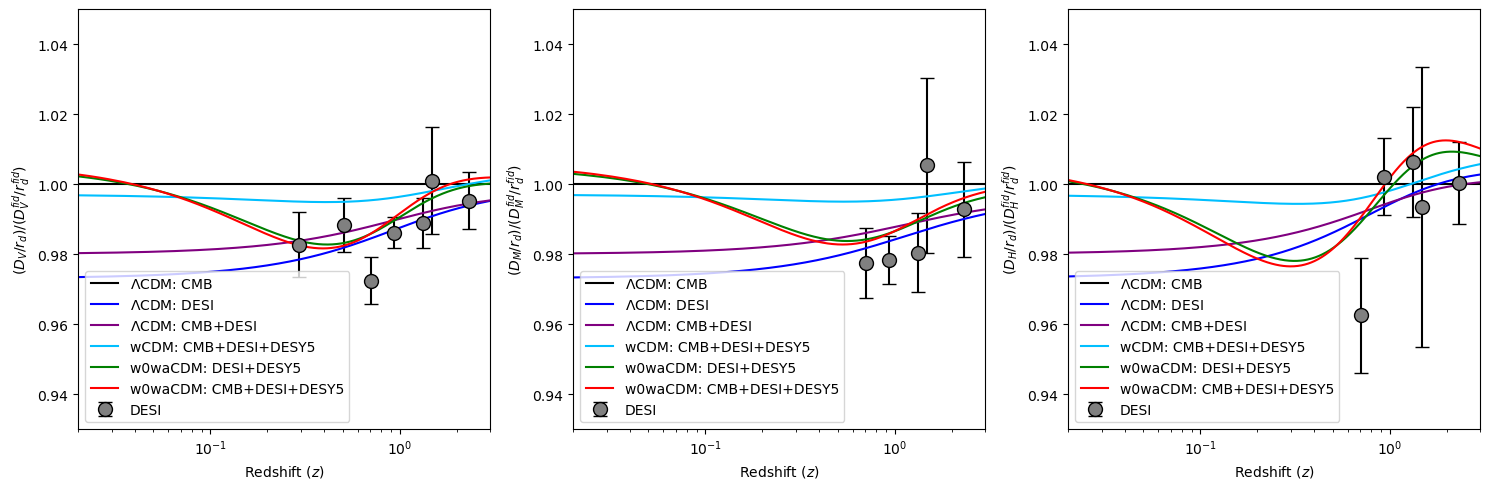

In [ ]:
figure, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].errorbar(z_eff, D_V_ratio, yerr=D_V_ratio_err, fmt='o', label='DESI',
               color='gray', ecolor='black', capsize=5,
               markeredgecolor='black', markeredgewidth=1, markersize=10)
ax[0].plot(z_list, dv_LCDM_CMB, color='black', label=r'$\Lambda$CDM: CMB')
ax[0].plot(z_list, dv_LCDM_DESI, color='blue', label=r'$\Lambda$CDM: DESI')
ax[0].plot(z_list, dv_LCDM_DESI_CMB, color='purple', label=r'$\Lambda$CDM: CMB+DESI')
ax[0].plot(z_list, dv_wCDM_DESI_CMB_DESY5, color='deepskyblue', label='wCDM: CMB+DESI+DESY5')
ax[0].plot(z_list, dv_w0waCDM_DESI_DESY5, color='green', label='w0waCDM: DESI+DESY5')
ax[0].plot(z_list, dv_w0waCDM_DESI_CMB_DESY5, color='red', label='w0waCDM: CMB+DESI+DESY5')
ax[0].set_xscale('log')
ax[0].set_xlim(0.02, 3)
ax[0].set_ylim(0.93, 1.05)
ax[0].set_xlabel("Redshift ($z$)")
ax[0].set_ylabel(r"$(D_V / r_d) / (D_V^{fid} / r_d^{fid})$")
ax[0].legend(loc='lower left')

ax[1].errorbar(z_eff, D_M_ratio, yerr=D_M_ratio_err, fmt='o', label='DESI',
               color='gray', ecolor='black', capsize=5,
               markeredgecolor='black', markeredgewidth=1, markersize=10)
ax[1].plot(z_list, dm_LCDM_CMB, color='black', label=r'$\Lambda$CDM: CMB')
ax[1].plot(z_list, dm_LCDM_DESI, color='blue', label=r'$\Lambda$CDM: DESI')
ax[1].plot(z_list, dm_LCDM_DESI_CMB, color='purple', label=r'$\Lambda$CDM: CMB+DESI')
ax[1].plot(z_list, dm_wCDM_DESI_CMB_DESY5, color='deepskyblue', label='wCDM: CMB+DESI+DESY5')
ax[1].plot(z_list, dm_w0waCDM_DESI_DESY5, color='green', label='w0waCDM: DESI+DESY5')
ax[1].plot(z_list, dm_w0waCDM_DESI_CMB_DESY5, color='red', label='w0waCDM: CMB+DESI+DESY5')
ax[1].set_xscale('log')
ax[1].set_xlim(0.02, 3)
ax[1].set_ylim(0.93, 1.05)
ax[1].set_xlabel("Redshift ($z$)")
ax[1].set_ylabel(r"$(D_M / r_d) / (D_M^{fid} / r_d^{fid})$")
ax[1].legend(loc='lower left')

ax[2].errorbar(z_eff, D_H_ratio, yerr=D_H_ratio_err, fmt='o', label='DESI',
               color='gray', ecolor='black', capsize=5,
               markeredgecolor='black', markeredgewidth=1, markersize=10)
ax[2].plot(z_list, dh_LCDM_CMB, color='black', label=r'$\Lambda$CDM: CMB')
ax[2].plot(z_list, dh_LCDM_DESI, color='blue', label=r'$\Lambda$CDM: DESI')
ax[2].plot(z_list, dh_LCDM_DESI_CMB, color='purple', label=r'$\Lambda$CDM: CMB+DESI')
ax[2].plot(z_list, dh_wCDM_DESI_CMB_DESY5, color='deepskyblue', label='wCDM: CMB+DESI+DESY5')
ax[2].plot(z_list, dh_w0waCDM_DESI_DESY5, color='green', label='w0waCDM: DESI+DESY5')
ax[2].plot(z_list, dh_w0waCDM_DESI_CMB_DESY5, color='red', label='w0waCDM: CMB+DESI+DESY5')
ax[2].set_xscale('log')
ax[2].set_xlim(0.02, 3)
ax[2].set_ylim(0.93, 1.05)
ax[2].set_xlabel("Redshift ($z$)")
ax[2].set_ylabel(r"$(D_H / r_d) / (D_H^{fid} / r_d^{fid})$")
ax[2].legend(loc='lower left')

figure.tight_layout()